In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

## Question 1.5

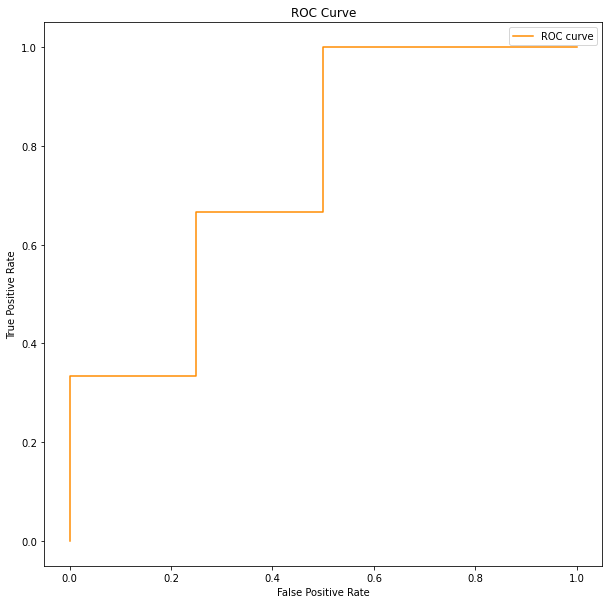

[1.95 0.95 0.85 0.8  0.55 0.45 0.3  0.1 ]
[0.         0.16666667 0.33333333 0.33333333 0.66666667 0.66666667
 1.         1.        ]
[0.   0.   0.   0.25 0.25 0.5  0.5  1.  ]


In [4]:
y_score = np.array([.95,.85,.8,.7,.55,.45,.4,.3,.2,.1])
y_true = np.array([1,1,0,1,1,0,1,1,0,0])
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
# plot ROC curve and thresholds
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig("q1q5.jpg")
plt.show()


print(thresholds)
print(tpr)
print(fpr)

## Question 2.1

In [26]:
# Load the data
train_XY = np.loadtxt('hw3data/D2z.txt')
train_X = train_XY[:,0:2]
train_Y = train_XY[:,2] 
test_X0 = np.arange(-2,2,0.1)
test_X1 = np.arange(-2,2,0.1)
test_X = np.zeros((len(test_X0),2))
test_X = np.meshgrid(test_X0,test_X1) 
test_X = np.array(test_X) 
test_X = np.transpose(test_X) 
test_X = np.reshape(test_X,(len(test_X0)*len(test_X1),2)) 

In [27]:
def kNN(X, Y, k, x):
  
    dist = np.linalg.norm(X - x, axis=1)
    
    idx = np.argsort(dist)[:k]
   
    labels = Y[idx]
 
    counts =   np.bincount(labels.astype(int))
   
    y_pred = np.argmax(counts)
    confidence = 0
    if len(counts) > 1 and k > 1:
        confidence = counts[1]/(counts[0]+counts[1]) # confidence of the prediction
   
    return y_pred, confidence

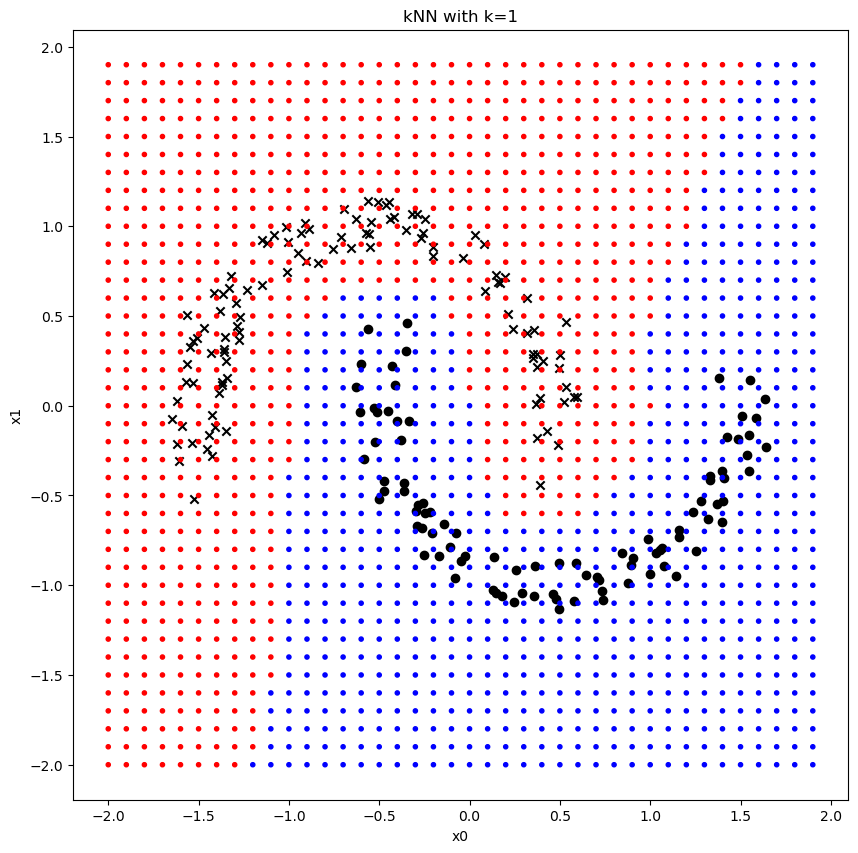

In [28]:
pred_Y = np.zeros(len(test_X))
for i in range(len(test_X)):
    pred_Y[i],_ = kNN(train_X, train_Y, 1, test_X[i])

plt.figure(figsize=(10,10))
plt.scatter(train_X[train_Y == 1,0], train_X[train_Y == 1,1], c='black',marker='x')
plt.scatter(train_X[train_Y == 0,0], train_X[train_Y == 0,1], c='black',marker='o', facecolors='none')
plt.scatter(test_X[:,0], test_X[:,1], c=pred_Y, cmap='bwr', marker='.')
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('kNN with k=1')
plt.savefig('q2q1.jpg') 
plt.show()



## Question 2.2

In [29]:
# Load emails.csv
emails_csv = pd.read_csv('hw3data/emails.csv')
emails_XY = emails_csv.values[:,1:].astype(float) 
# 5 folds cross validation
emails_XY_folds =[emails_XY[0:1000,:], emails_XY[1000:2000,:], emails_XY[2000:3000,:], emails_XY[3000:4000,:], emails_XY[4000:5000,:]] 

In [143]:
# 1-NN on 5 folds cross validation
acc_vec = []
precision_vec = []
recall_vec = []
for i in range(5):
    train_XY = [emails_XY_folds[j] for j in range(5) if j != i] 
    train_XY = np.concatenate(train_XY, axis=0) 
    test_XY = emails_XY_folds[i] 
    
    train_X = train_XY[:,0:3000]
    train_Y = train_XY[:,-1] 
    test_X = test_XY[:,0:3000]
    test_Y = test_XY[:,-1] 
    pred_Y = np.zeros(len(test_X)) #
    
  
    for j in range(len(test_X)):
        pred_Y[j] = kNN(train_X, train_Y, 1, test_X[j])

    # compute accuracy, precision, recall
    true_pos = np.sum((pred_Y == 1) & (test_Y == 1))
    true_neg = np.sum((pred_Y == 0) & (test_Y == 0)) 
    false_pos = np.sum((pred_Y == 1) & (test_Y == 0)) 
    false_neg = np.sum((pred_Y == 0) & (test_Y == 1)) 
    
    acc = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg) 
    precision = true_pos / (true_pos + false_pos) 
    recall = true_pos / (true_pos + false_neg) 
    
    acc_vec.append(acc) 
    precision_vec.append(precision)
    recall_vec.append(recall) 
print('Accuracy: ', acc_vec) 
print('Precision: ', precision_vec) 
print('Recall: ', recall_vec) 

Accuracy:  [0.825, 0.855, 0.863, 0.854, 0.775]
Precision:  [0.6536312849162011, 0.6896551724137931, 0.7220543806646526, 0.7215568862275449, 0.6051948051948052]
Recall:  [0.8210526315789474, 0.8664259927797834, 0.8415492957746479, 0.8197278911564626, 0.761437908496732]


## Question 2.3

In [6]:
# logistic regression w/ gradient descent
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def logistic_regression(X, Y, alpha, num_iter):
   
    w = np.zeros(X.shape[1])
 
    # Gradient descent
    for i in range(num_iter):
       
        pred_Y = sigmoid(np.dot(X, w))
    
        dw = np.dot(X.T, pred_Y - Y)
        w -= alpha * dw
   
    return w

In [19]:
# do logistic regression on the 5 folds cross validation
acc_vec = []
precision_vec = []
recall_vec = []

for i in range(5):
   
    train_XY = [emails_XY_folds[j] for j in range(5) if j != i]
    train_XY = np.concatenate(train_XY, axis=0)
    train_X = train_XY[:,0:3000]
    train_Y = train_XY[:,-1]
   
    test_XY = emails_XY_folds[i]
    test_X = test_XY[:,0:3000]
    test_Y = test_XY[:,-1]

    
    w = logistic_regression(train_X, train_Y, 0.001, 1000)
  
    pred_Y = sigmoid(np.dot(test_X, w))
    pred_Y = np.round(pred_Y)

    true_pos = np.sum((pred_Y == 1) & (test_Y == 1)) 
    true_neg = np.sum((pred_Y == 0) & (test_Y == 0)) 
    false_pos = np.sum((pred_Y == 1) & (test_Y == 0))
    false_neg = np.sum((pred_Y == 0) & (test_Y == 1)) 

    
    acc = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)
    precision = true_pos / (true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)

    acc_vec.append(acc)
    precision_vec.append(precision)
    recall_vec.append(recall)

print('Accuracy: ', acc_vec)
print('Precision: ', precision_vec)
print('Recall: ', recall_vec)

C:\Users\nevindu\AppData\Local\Temp\ipykernel_26584\3238637445.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Accuracy:  [0.907, 0.804, 0.892, 0.878, 0.847]
Precision:  [0.8692307692307693, 0.5894039735099338, 0.8333333333333334, 0.8467741935483871, 0.776173285198556]
Recall:  [0.7929824561403509, 0.9638989169675091, 0.7746478873239436, 0.7142857142857143, 0.7026143790849673]


## Question 2.4

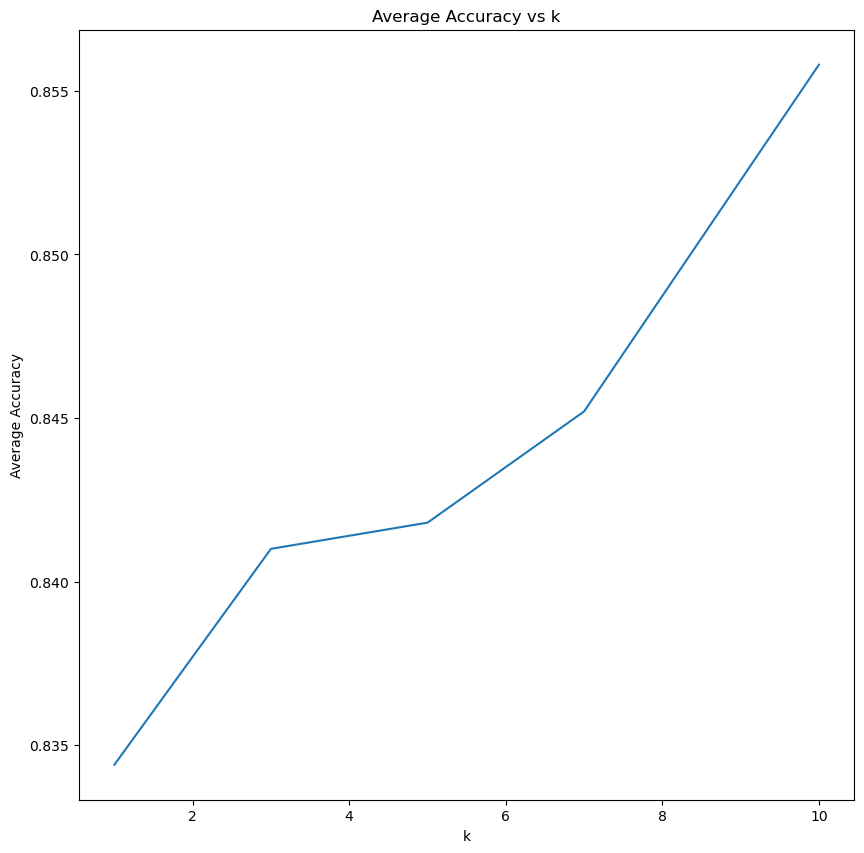

In [148]:
k_arr = [1,3,5,7,10]
avg_acc_vec = []
avg_precision_vec = []
avg_recall_vec = []

for k in k_arr:
    acc_vec = []
    precision_vec = []
    recall_vec = []
    for i in range(5):
        train_XY = [emails_XY_folds[j] for j in range(5) if j != i] 
        train_XY = np.concatenate(train_XY, axis=0) 
        train_X = train_XY[:,0:3000]
        train_Y = train_XY[:,-1]

        test_XY = emails_XY_folds[i] 
        test_X = test_XY[:,0:3000]
        test_Y = test_XY[:,-1]

        pred_Y = np.zeros(len(test_X)) # predicted labels
        
        for j in range(len(test_X)):
            pred_Y[j],_ = kNN(train_X, train_Y, k, test_X[j])
        
        true_pos = np.sum((pred_Y == 1) & (test_Y == 1)) 
        true_neg = np.sum((pred_Y == 0) & (test_Y == 0)) 
        false_pos = np.sum((pred_Y == 1) & (test_Y == 0))
        false_neg = np.sum((pred_Y == 0) & (test_Y == 1))
        
        acc = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)
        precision = true_pos / (true_pos + false_pos) 
        recall = true_pos / (true_pos + false_neg) 

        acc_vec.append(acc) 
        precision_vec.append(precision)
        recall_vec.append(recall)
        
    avg_acc_vec.append(np.mean(acc_vec))
    avg_precision_vec.append(np.mean(precision_vec)) 
    avg_recall_vec.append(np.mean(recall_vec))
    

plt.figure(figsize=(10,10))
plt.plot(k_arr, avg_acc_vec)
plt.xlabel('k')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy vs k')
plt.savefig('q2q4.jpg') 
plt.show()

## Question 2.5

In [185]:
train_XY = emails_XY[0:4000,:] 
test_XY = emails_XY[4000:,:]

train_X = train_XY[:,0:3000]
train_Y = train_XY[:,-1] 
test_X = test_XY[:,0:3000]
test_Y = test_XY[:,-1]

In [46]:
# compute roc curve for 5-KNN
y_pred = np.zeros(len(test_X)) 
y_conf = np.zeros(len(test_X)) # confidence of the prediction
for i in range(len(test_X)):
   pred,conf = kNN(train_X, train_Y, 5, test_X[i]) 
   y_pred[i] = pred
   y_conf[i] = conf
   
fpr_knn, tpr_knn, thresholds = metrics.roc_curve(test_Y, y_conf)
auc_score_knn = metrics.roc_auc_score(test_Y, y_conf)
print(auc_score_knn)


0.8473893880318699


In [45]:
# compute roc curve for logistic regression
w = logistic_regression(train_X, train_Y, 1e-4, 5000) 
y_conf = sigmoid(np.dot(test_X, w)) # logits?
y_pred = np.round(y_pred)
fpr_log, tpr_log, thresholds = metrics.roc_curve(test_Y, y_conf)
auc_score_log = metrics.roc_auc_score(test_Y, y_conf)
print(auc_score_log)

C:\Users\nevindu\AppData\Local\Temp\ipykernel_26584\3238637445.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


0.942777495244015


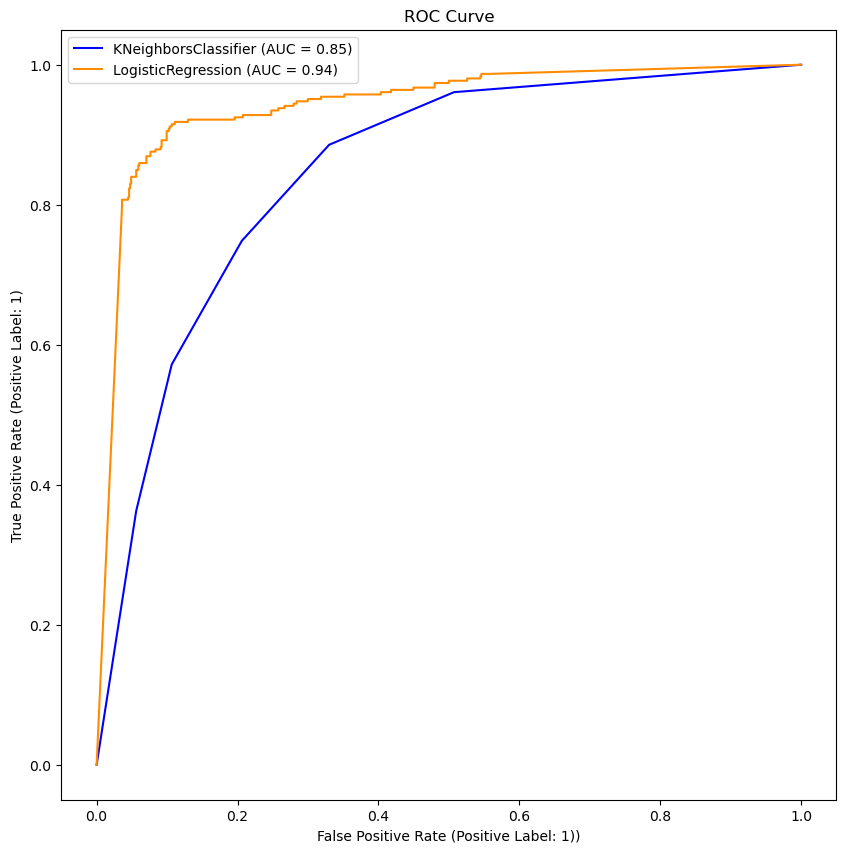

In [48]:
# plot roc curves
plt.figure(figsize=(10,10))
plt.plot(fpr_knn, tpr_knn, color='blue', label=f'KNeighborsClassifier (AUC = {auc_score_knn:.2f})')
plt.plot(fpr_log, tpr_log, color='darkorange', label=f'LogisticRegression (AUC = {auc_score_log:.2f})')
plt.xlabel('False Positive Rate (Positive Label: 1))')
plt.ylabel('True Positive Rate (Positive Label: 1)')
plt.title('ROC Curve')
plt.legend()
plt.savefig('q2q5.jpg') 